In [20]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
def show_min_max(array, i):
    random_image = array[i]
    print(random_image.min(), random_image.max())

def plot_image(array, i, labels):
    plt.imshow(np.squeeze(array[i]))
    plt.title(" Digit " + str(labels[i]))
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [22]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)
num_classes = 10

In [23]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
(train_images_bak, train_labels_bak), (test_images_bak, test_labels_bak) = mnist.load_data()

In [24]:
print(type(train_images))
print(train_images.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)


In [25]:
train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)

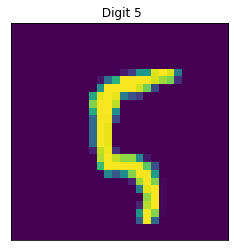

0 255


In [26]:
index = 100

plot_image(train_images, index, train_labels)

show_min_max(train_images, index)

In [27]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0


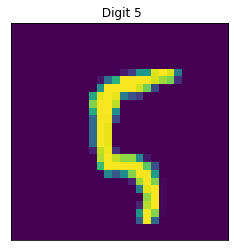

0.0 1.0


In [28]:
index = 100

plot_image(train_images, index, train_labels)

show_min_max(train_images, index)

In [29]:
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

In [30]:
train_labels[100]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [32]:
epochs = 10

In [33]:
model = Sequential()
model.add(Flatten(input_shape = input_shape))

model.add(Dense(14, activation = 'sigmoid'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 14)                10990     
                                                                 
 dense_7 (Dense)             (None, 12)                180       
                                                                 
 dense_8 (Dense)             (None, 10)                130       
                                                                 
Total params: 11,300
Trainable params: 11,300
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics =['accuracy'])

In [35]:
model.fit(train_images, train_labels, epochs = 10, shuffle = True)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6950 - accuracy: 0.8029
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2817 - accuracy: 0.9202
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2357 - accuracy: 0.9323
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2110 - accuracy: 0.9391
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1945 - accuracy: 0.9437: 0s - loss: 0.193
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1825 - accuracy: 0.9463
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1723 - accuracy: 0.9492
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1647 - accuracy: 0.9508
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1576 - accuracy: 0.9536: 0s - loss: 0.1577  - ETA: 0s - ETA: 0s - loss: 0.1578 - accurac

In [36]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.1837 - accuracy: 0.9477 - 970ms/epoch - 3ms/step

Test accuracy: 0.947700023651123


In [37]:
model.save('number.h5')

In [38]:
index = 100
img = np.expand_dims(test_images[index], axis = 0)

model.predict(img)

array([[1.6777290e-04, 5.4663938e-06, 2.0510065e-03, 4.3649296e-05,
        1.4687616e-06, 3.1235977e-05, 9.9767798e-01, 2.9382517e-07,
        2.1180858e-05, 2.7049280e-08]], dtype=float32)